In [157]:
import numpy as np
import pandas as pd
import math

In [158]:
data = pd.read_csv("iris.csv")

In [159]:
data.columns = ["id","SL","SW","PL","PW","species"]

In [160]:
data.head(2)

,id,SL,SW,PL,PW,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [161]:
data.drop("id",inplace = True,axis=1)

In [162]:
data.head(2)

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [163]:
x_data = data.iloc[:,0:4]

In [164]:
x_data.head(2)

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [165]:
x_data.shape

(150, 4)

In [114]:
x_array = np.array(x_data)
print(x_array[0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


In [166]:
def mean_std_dev(lst):
    """This will calculate mean and standard devation"""
    mean = sum(lst)/len(lst)
    st = 0
    for i in lst:
        st += ((i-mean)**2)
        
    std = math.sqrt(st/len(lst))
    
    return mean,std   

In [167]:
def standardize(lst):
    
    """Standrdzation"""
    mean,std = mean_std_dev(lst)
    
    standard_feature = []
    
    for i in lst:
        st = (i-mean)/std
        standard_feature.append(st)
        
    return standard_feature
        

In [168]:
feature_1 = standardize(x_array[:,0])
feature_2 = standardize(x_array[:,1])
feature_3 = standardize(x_array[:,2])
feature_4 = standardize(x_array[:,3])

In [170]:
data["SL"] = feature_1
data["SW"] = feature_2
data["PL"] = feature_3
data["PW"] = feature_4

X = np.array(data.iloc[:,0:4])
print(X[:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [171]:
S = np.dot(X.T,X)/(len(X)-1)

In [172]:
print(S)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [121]:
#inbuilt function
#S = np.cov(X.T)

In [173]:
a = np.linalg.eig(S)

In [174]:
a

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [176]:
eigen_total = sum(a[0])
eig_1 = a[0][0]/eigen_total
eig_2 = a[0][1]/eigen_total
eig_3 = a[0][2]/eigen_total
eig_4 = a[0][3]/eigen_total

eig_all = [eig_1,eig_2,eig_3,eig_4]

print("First eigen vector contribution, ", )
print("Cummuative contribution to variance : ", np.cumsum(eig_all))

First eigen vector contribution, 
Cummuative contribution to variance :  [0.72770452 0.95800975 0.99484807 1.        ]


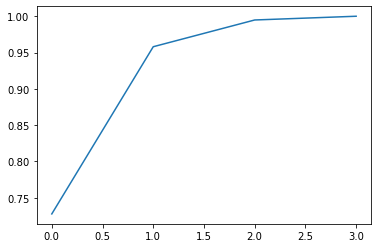

In [187]:
plt.plot(np.cumsum(eig_all))
plt.show()

In [177]:
top_eig = a[0][0:2]
top_eig_vectors = a[1][:,0:2]
top_eig_vectors

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [126]:
np.dot(top_eig_vectors[:,0],top_eig_vectors[:,1])

2.983724378680108e-16

In [127]:
X.shape

(150, 4)

In [178]:
_2d_features = X.dot(top_eig_vectors)

In [179]:
_2d_features

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

In [180]:
new_data = pd.DataFrame()

In [181]:
new_data["First_PC"] = _2d_features[:,0]
new_data["Second_PC"] = _2d_features[:,1]
new_data["Species"] = data["species"]

In [182]:
new_data.head()

,First_PC,Second_PC,Species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


In [183]:
new_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

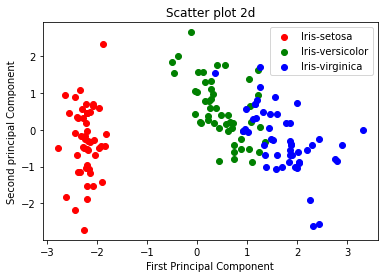

In [185]:
plt.figure()
y_names = new_data["Species"].unique()
y = new_data["Species"]

for c,i,y_name in zip("rgb",["Iris-setosa","Iris-versicolor","Iris-virginica"],y_names):
    plt.scatter(new_data[y==i][:]["First_PC"],new_data[y==i][:]["Second_PC"],c=c,label=y_name)

plt.xlabel("First Principal Component")
plt.ylabel("Second principal Component")
plt.title("Scatter plot 2d")
plt.legend()
plt.show()

